In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
X.shape

(506, 13)

In [5]:
Y.shape

(506,)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)

# GD for linear regression

In [7]:
# return hx
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
  
        

# cost function
def cost(y,y_predicted):
    s=0
    m=len(y)
    for i in range(m):
        s+=(y_predicted[i] - y[i])**2
    return (1/m)*s

#derivative of cost function
def dcost(x,y,y_predicted):
    s=0
    m=len(y)
    for i in range(m):
        s+=x[i]*(y_predicted[i]-y[i])
    return (2/m)*s

# gradient function
def gradient_descent(x,y,learning_rate):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 1000
    n = len(x)
    costs = []

    for i in range(epoch):
        y_predicted = predicted_y(weight_vector,x,intercept)

        costs.append(cost(y,y_predicted))
        weight_vector = weight_vector - learning_rate * dcost(x,y,y_predicted) 
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        
    plt.plot(np.arange(1,epoch),costs[1:])
    plt.xlabel("number of iteration")
    plt.ylabel("Cost")
    
    return weight_vector,intercept


# REGULARIZATION

In [25]:
def reg1(y,y_predicted):
    s=0
    m = len(y)
    for i in range(m):
        s+=(y_predicted[i] - y[i])**2
    return s

def reg2(weight_vector,delta):
  s = 0
  for weight in weight_vector:
    s+= weight**2
  return delta*s

def dcostReg(x,y,y_predicted):
    s=0
    m=len(y)
    for i in range(m):
        s+=x[i]*(y_predicted[i] - y[i])
    return (2/m)*s

def gradient_descent_withL2(x,y,learning_rate,delta):
    weight_vector=np.random.randn(x.shape[1])
    
    intercept=0
    epoch = 1000
    n = len(x)
    m = len(y)
    costs = []
    for i in range(epoch):
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        costs.append((reg1(y,y_predicted)+reg2(weight_vector,delta))/m)
        weight_vector = weight_vector - (learning_rate *(dcostReg(x,y,y_predicted) + ((2*delta/m)*weight_vector)))
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        

    
    plt.plot(np.arange(1,epoch),costs[1:]) 
    plt.xlabel("number of iterations")
    plt.ylabel("Cost")
    
    return weight_vector,intercept

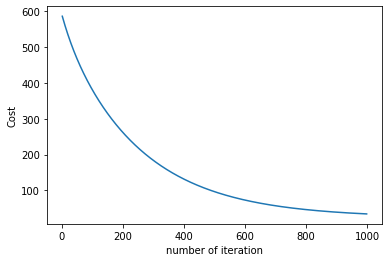

In [115]:
# 0.001, 0.01, 0.1, 1.0
w,b=gradient_descent(X_transform,Y,0.001)

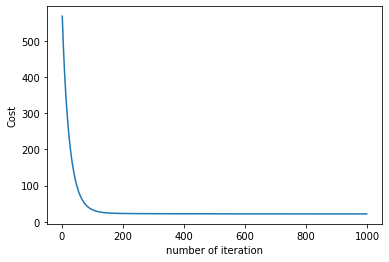

In [116]:
w1,b1=gradient_descent(X_transform,Y,0.01)

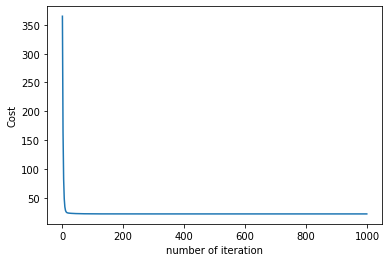

In [117]:
w2,b2=gradient_descent(X_transform,Y,0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


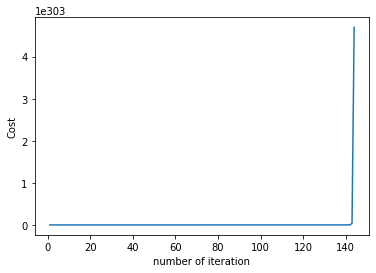

In [118]:
w3,b3=gradient_descent(X_transform,Y,1.0)

In [119]:
print("weight:",w)
print("bias:",b)

weight: [-0.73002112 -0.01245214 -0.36186907  0.94525216 -0.96106368  3.47316228
  0.22998497 -0.66281571  0.81148451 -0.46052689 -2.24029314  0.82991319
 -2.40383566]
bias: 19.489423598561054


# PREDICT

In [10]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [11]:
y_pred=predict(X_transform)

In [12]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,28.9
1,21.6,22.7
2,34.7,28.3
3,33.4,27.7
4,36.2,27.2
...,...,...
501,22.4,21.0
502,20.6,19.5
503,23.9,24.7
504,22.0,23.4


32.85771309490754

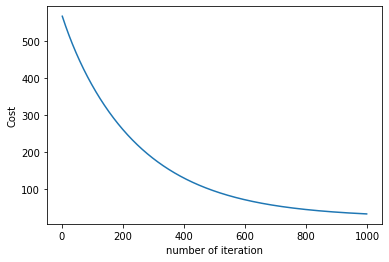

In [30]:
w,b=gradient_descent(X_transform,Y,0.001)
y_pred=predict(X_transform)
mean_squared_error(Y, y_pred)

𝜆 = 0.01, 0.1, 1.0, 10.0

33.010863015295925

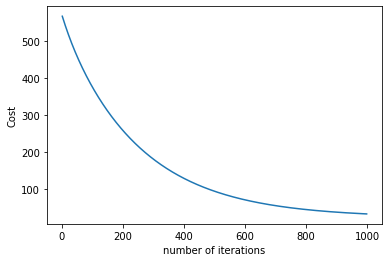

In [29]:
w,b=gradient_descent_withL2(X_transform,Y,0.001,0.01)
y_pred=predict(X_transform)
mean_squared_error(Y, y_pred)

34.25519675591766

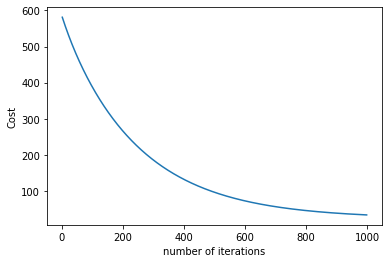

In [28]:
w,b=gradient_descent_withL2(X_transform,Y,0.001,0.1)
y_pred=predict(X_transform)
mean_squared_error(Y, y_pred)

46.68607720333906

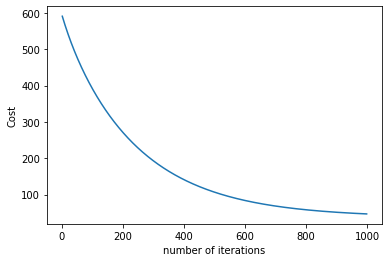

In [27]:
w,b=gradient_descent_withL2(X_transform,Y,0.001,1.0)
y_pred=predict(X_transform)
mean_squared_error(Y, y_pred)

77.36111194510069

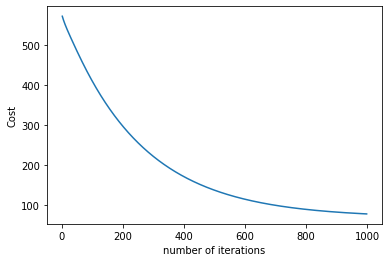

In [26]:
w,b=gradient_descent_withL2(X_transform,Y,0.001,10.0)
y_pred=predict(X_transform)
mean_squared_error(Y, y_pred)

# SKLEARN

In [78]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

In [ ]:
model.intercept_

In [28]:
model.coef_

array([-0.88048161,  0.97902279, -0.14350164,  0.72285962, -1.92482247,
        2.78957137, -0.05275392, -3.02366023,  1.97478354, -1.38559866,
       -2.04302442,  0.871989  , -3.75093594])

In [29]:
w

array([-0.46748296,  0.05670799, -0.78335548,  0.59162958, -0.58084607,
        2.8592699 ,  0.77121501, -0.83951693,  0.78931159, -1.00044737,
       -1.82714677,  0.38324986, -3.56237381])